# Lab 08 - Relational Data and Strings



In [1]:
# install.packages("sqldf") # run these if using Colab
# install.packages("nycflights13")

In [2]:
library(tidyverse)
library(nycflights13)
library(sqldf)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



In [3]:
# load the data
# source: https://www.kaggle.com/manjeetsingh/retaildataset
features <- read_csv("https://raw.githubusercontent.com/bmanzo/stats306_labs/master/lab07/features.csv")
sales <- read_csv("https://raw.githubusercontent.com/bmanzo/stats306_labs/master/lab07/sales.csv")
stores <- read_csv("https://raw.githubusercontent.com/bmanzo/stats306_labs/master/lab07/stores.csv")

Rows: 8190 Columns: 12

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): Date
dbl (10): Store, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, M...
lgl  (1): IsHoliday


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 421570 Columns: 5

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): Date
dbl (3): Store, Dept, Weekly_Sales
lgl (1): IsHoliday


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 45 Columns: 3

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): Type
dbl (2): St

### More joins

**Inner joins**
Inner joins match a pair of observations whenever their keys are equal.

**Outer joins**
An outer join keeps observations that appear in at least one of the tables. There are three types of outer joins:
- A left join keeps all observations in x.
- A right join keeps all observations in y.
- A full join keeps all observations in x and y.

**Semi-join**
`semi_join(x, y)` keeps all the observations in `x` that are also in `y`.

**Anti-join**
The opposite of a semi-join is an anti-join.

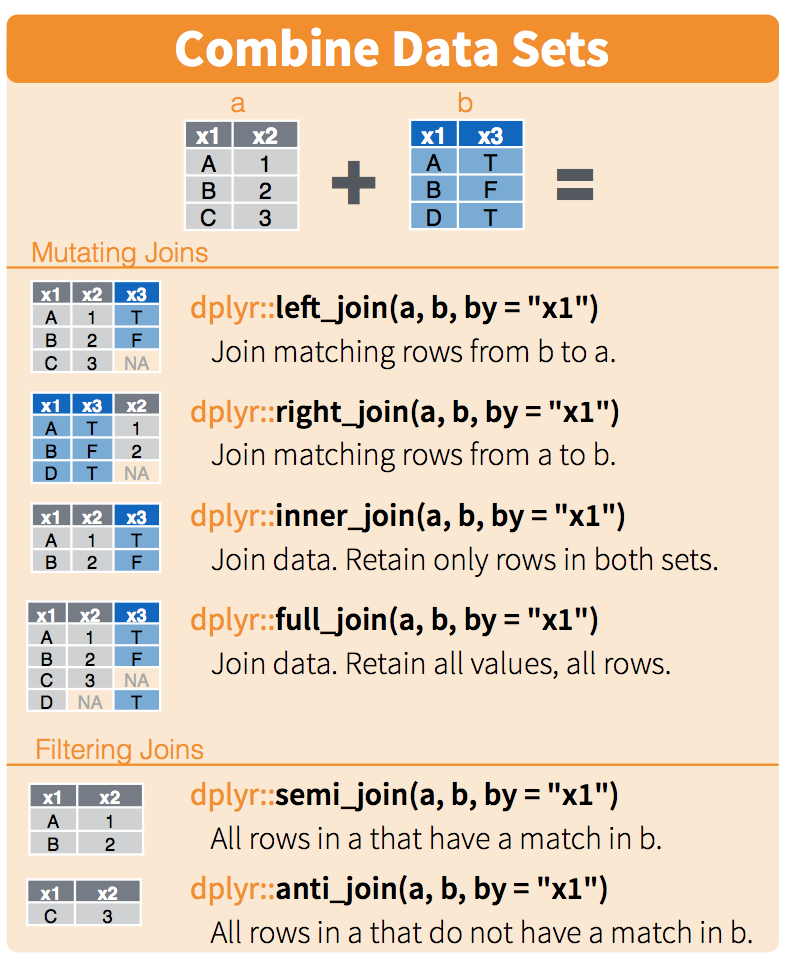

Besides `left_join`, another common join is the `inner_join`, which only includes observations associated to keys that are in both tables. 

In [4]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     3, "x3"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     4, "y3"
)
inner_join(x, y)

Joining, by = "key"



key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2


This data includes historical sales for a number of large stores, and first we'll need to join the store level data to the individual sales level data. We'll use an inner join to add the `stores` data to the `sales` data, then we'll use a left join to add the `features` data, which includes more specific details about the store and the date of the sale. 

In [5]:
sales_stores = inner_join(sales, stores, by="Store")
head(sales_stores)

Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<chr>,<dbl>
1,1,05/02/2010,24924.50,FALSE,A,151315
1,1,12/02/2010,46039.49,TRUE,A,151315
1,1,19/02/2010,41595.55,FALSE,A,151315
1,1,26/02/2010,19403.54,FALSE,A,151315
1,1,05/03/2010,21827.90,FALSE,A,151315
1,1,12/03/2010,21043.39,FALSE,A,151315


In [6]:
full_data = left_join(sales_stores, features, by=c("Store", "Date", "IsHoliday"))

In [7]:
head(full_data)

Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,05/02/2010,24924.50,FALSE,A,151315,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106
1,1,12/02/2010,46039.49,TRUE,A,151315,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106
1,1,19/02/2010,41595.55,FALSE,A,151315,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106
1,1,26/02/2010,19403.54,FALSE,A,151315,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106
1,1,05/03/2010,21827.90,FALSE,A,151315,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106
1,1,12/03/2010,21043.39,FALSE,A,151315,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106


In [8]:
summary(full_data)

     Store           Dept           Date            Weekly_Sales   
 Min.   : 1.0   Min.   : 1.00   Length:421570      Min.   : -4989  
 1st Qu.:11.0   1st Qu.:18.00   Class :character   1st Qu.:  2080  
 Median :22.0   Median :37.00   Mode  :character   Median :  7612  
 Mean   :22.2   Mean   :44.26                      Mean   : 15981  
 3rd Qu.:33.0   3rd Qu.:74.00                      3rd Qu.: 20206  
 Max.   :45.0   Max.   :99.00                      Max.   :693099  
                                                                   
 IsHoliday           Type                Size         Temperature    
 Mode :logical   Length:421570      Min.   : 34875   Min.   : -2.06  
 FALSE:391909    Class :character   1st Qu.: 93638   1st Qu.: 46.68  
 TRUE :29661     Mode  :character   Median :140167   Median : 62.09  
                                    Mean   :136728   Mean   : 60.09  
                                    3rd Qu.:202505   3rd Qu.: 74.28  
                                    

In [9]:
# we need to adjust some of the variable types
full_data$Store = as.factor(full_data$Store)
full_data$Dept = as.factor(full_data$Dept)
full_data$Type = as.factor(full_data$Type)

We also need to adjust the date - how should we do that? 

In [10]:
full_data$Date = as.Date(full_data$Date, format = "%d / %m / %Y")

In [11]:
summary(full_data) # everything looks good now

     Store             Dept             Date             Weekly_Sales   
 13     : 10474   1      :  6435   Min.   :2010-02-05   Min.   : -4989  
 10     : 10315   2      :  6435   1st Qu.:2010-10-08   1st Qu.:  2080  
 4      : 10272   3      :  6435   Median :2011-06-17   Median :  7612  
 1      : 10244   4      :  6435   Mean   :2011-06-18   Mean   : 15981  
 2      : 10238   7      :  6435   3rd Qu.:2012-02-24   3rd Qu.: 20206  
 24     : 10228   8      :  6435   Max.   :2012-10-26   Max.   :693099  
 (Other):359799   (Other):382960                                        
 IsHoliday       Type            Size         Temperature       Fuel_Price   
 Mode :logical   A:215478   Min.   : 34875   Min.   : -2.06   Min.   :2.472  
 FALSE:391909    B:163495   1st Qu.: 93638   1st Qu.: 46.68   1st Qu.:2.933  
 TRUE :29661     C: 42597   Median :140167   Median : 62.09   Median :3.452  
                            Mean   :136728   Mean   : 60.09   Mean   :3.361  
                          

**Exercise:** Perform the same join using SQL

In [12]:
full_data = left_join(sales_stores, features, by=c("Store", "Date", "IsHoliday"))

Hint: use this syntax (review lecture 7.1)

In [ ]:
# {sql}
# SELECT * FROM <table> LEFT JOIN <other_table> ON <left_key_col> = <right_key_col>

In [20]:
# This function takes the data.frame outputted from sqldf
sqltbl <- function(...) sqldf(...)

In [22]:
# Your solution

Other types of joins covered in lecture include the semi join and the anti join. We'll briefly look at some examples here.

If you are really afraid of flying, you might not want to fly on old planes. How can you use anti join to find the flights that took place on planes <5 years old?

In [25]:
# https://rdrr.io/cran/nycflights13/man/airlines.html

In [12]:
plane_ages = mutate(planes, age = 2013 - year)
old_planes = plane_ages %>% filter(age >=5)
safe_flights = anti_join(flights, old_planes, by="tailnum") 
head(safe_flights, 3) 
planes[which(planes$tailnum=="N39463"),]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


tailnum,year,type,manufacturer,model,engines,seats,speed,engine
N39463,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan


In [13]:
old_flights = semi_join(flights, old_planes, by="tailnum")
dim(old_flights)[1]
dim(safe_flights)[1]
dim(flights)[1]
dim(old_flights)[1] + dim(safe_flights)[1]

[1] 250507

[1] 86269

[1] 336776

[1] 336776

We can see above that the anti join is the opposite of the semi join

### SQL commands and `dplyr`

Note: we will not cover this in class but you may find [`dbplyr`](https://dbplyr.tidyverse.org/) useful. This package converts `dplyr` code (e.g., `filter` and `summarise`) to SQL commands. 

A simple question to ask is which store has the highest average weekly sales during holidays. We can use `dplyr` commands for this

In [25]:
full_data %>% 
    filter(IsHoliday==TRUE) %>% 
    group_by(Store) %>% 
    summarise(avg_sales = mean(Weekly_Sales), count=n()) %>% 
    arrange(desc(avg_sales)) %>% 
    head(5)

Store,avg_sales,count
<dbl>,<dbl>,<int>
20,31106.99,723
4,30854.23,727
14,30164.77,703
10,29195.52,724
2,28798.71,722


**Exercise:** create the same table using SQL commands

In [ ]:
# Your solution

## Text analysis with Animal Crossing reviews

We'll try to learn some things about Animal Crossing by looking at user reviews. ([source](https://www.kaggle.com/jessemostipak/animal-crossing))

In [26]:
reviews = read_csv("https://raw.githubusercontent.com/bmanzo/stats306_labs/master/lab07/user_reviews.csv")
head(reviews)

Rows: 2999 Columns: 4

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): user_name, text, date
dbl (1): grade


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



grade,user_name,text,date
<dbl>,<chr>,<chr>,<chr>
4,mds27272,"My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unacceptable.",3/20/20
5,lolo2178,"While the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you haveWhile the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you have the other usershouse and furniture. I hope nintendo can soon fix this big issue, because for now, this killed any intentions i had to play the game.… Expand",3/20/20
0,Roachant,"My wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one personMy wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one person in your home that wants to play the game, you need two switches. Worst decision I have ever seen, this even beats EA.Congratulations Nintendo, you have officially become the worst video game company this year!… Expand",3/20/20
0,Houndf,"We need equal values and opportunities for all players on the island! My wife is the first player, which is great but I do not want to wait for her progress. At the same time, I do not want her to have a a second class player experience if I am the founder. Fix this Nintendo!!",3/20/20
0,ProfessorFox,BEWARE! If you have multiple people in your house that want to play this game they can not each have their own account (island). ONLY ONE customizable island can be played per Switch. Even if you buy two copies of the game you will still only be able to customize ONE island. I have 3 kids that want to play this game and they each want to customize their own island - AND THEY CANT!BEWARE! If you have multiple people in your house that want to play this game they can not each have their own account (island). ONLY ONE customizable island can be played per Switch. Even if you buy two copies of the game you will still only be able to customize ONE island. I have 3 kids that want to play this game and they each want to customize their own island - AND THEY CANT! This is absolutely unacceptable. Maybe the dumbest thing Nintendo has ever done. I have owned every Nintendo console since the original NES and I can not think of a worse decision by Nintendo.… Expand,3/20/20
0,tb726,"The limitation of one island per Switch (not per cartridge, per Switch) is nonsensical. It‘s obvious Nintendo is just trying to sell more Switch consoles. This means only one person in your family can enjoy the game to its fullest extent. Player 2 can barely do anything, and the

We'll ignore 0 star reviews as these are probably not as informative

In [27]:
reviews_clean = reviews %>% filter(grade > 0)
head(reviews_clean)

grade,user_name,text,date
<dbl>,<chr>,<chr>,<chr>
4,mds27272,"My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unacceptable.",3/20/20
5,lolo2178,"While the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you haveWhile the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you have the other usershouse and furniture. I hope nintendo can soon fix this big issue, because for now, this killed any intentions i had to play the game.… Expand",3/20/20
1,rafilks182,"they heavily marketed this game as a social experience. a game to share with your friends and family. but heres the catch, you will need 1 nintendo switch for each player to get the full experience. I bought the game to share it with my girlfriend but the first player is considered as the FOUNDER of the island, and he is the one that will progress the story, that will unlock stuff and dothey heavily marketed this game as a social experience. a game to share with your friends and family. but heres the catch, you will need 1 nintendo switch for each player to get the full experience. I bought the game to share it with my girlfriend but the first player is considered as the FOUNDER of the island, and he is the one that will progress the story, that will unlock stuff and do all the cool things. The second nintendo switch profile will act merely as a villager, with little to no impact on the game and not able to progress without the founders progress. Game ruined by greed, want to have the full experience? BUY 2 PHYSICAL COPIES AND 2 NINTENDO SWITCHES, yeah thats what nintendo requires of you to play a social game if you want to be social.… Expand",3/20/20
1,favouritecommi,"Alright, so first things first the game itself is alright, HOWEVER, if you have more than one person in your household only the FOUNDER will be able to enjoy it as supposed to. Not only you can not have multiple islands (not even sure how to react on that in 2020), but also the first player gets all proper interactions, quests etc. If you share a console other players will be limited toAlright, so first things first the game itself is alright, HOWEVER, if you have more than one person in your household only the FOUNDER will be able to enjoy it as supposed to. Not only you can not have multiple islands (not even sure how to react on that in 2020), but also the first player gets all proper interactions, quests etc. If you share a console other players will be limited to the progress of player 1.But what's worse is a local coop, the second player is basically a slave of the main one without inventory and even being able to proper pick-up stuff (so you have to jump around the main player for usual exchange). Not to mention the second player animation every time it picks sth up from the ground (like hey I found this) especially annoying when you have those quests like collect 200 sth. Also, the second player is unable to do anything while the first one is in the inventory menu.Also, small things like not being able to rotate the camera or change the location of the tent are anno

A lot of people are complaining about the inability of more than one person to play on the same console. What are some ways to quantify this?

In [30]:
str_count(reviews_clean$text, "2") %>% head()
mean(str_count(reviews_clean$text, "2") >0)
str_count(reviews_clean$text, "second") %>% head()
mean(str_count(reviews_clean$text, "second") >0)

[1] 2 0 2 5 0 0

[1] 0.1428571

[1] 0 0 1 3 0 0

[1] 0.07792208

What do people who really like the game say about it? 

In [33]:
big_fans = filter(reviews_clean, between(grade, 8, 10))
tail(big_fans, 4)

grade,user_name,text,date
<dbl>,<chr>,<chr>,<chr>
8,Jjdm11,"This review contains spoilers, click expand to view. Animal crossing new horizons is a brilliant return after the disappointment that was amiibo festival.This game has you start on a desert island where you live your life.Nook miles are a new addition that makes and breaks the game at the same time,the game has things to work towards something previous entries lacked this is fun however it can get grindy and greatly limit freedom with things locked behind nook walls that ought to be unlocked.This game has it’s polishing issues and bafflingly poor implementation of some ideas life travelling to new islands.The loading times are some of the worst in a video game 1-2 minutes the standard this is to load some of the best visuals in a switch game it looks like ps5 or even pc how this runs on a switch I’m unsure .This game has the foundation of an excellent game but falls short due to a lack of polish despite this ,this is still the best one in the series topping new leaf.… Expand",3/22/20
10,lunareclipse122,"This game is probably my favorite game and I’ve only had it for 2 days. I could not recommend this game enough, please if you have a switch go out and buy this game it is amazing!",3/22/20
9,Sage_the_Husky,"First off let me say that the 1 Island per Switch argument is completely invalid. All the previous entries have had this limitation and people are only just getting upset about it now. Population: Growing had only one town per memory card. Wild World only had one town per cartridge. City Folk had only one town per system. And New Leaf had only one town per cartridge. Out of all theFirst off let me say that the 1 Island per Switch argument is completely invalid. All the previous entries have had this limitation and people are only just getting upset about it now. Population: Growing had only one town per memory card. Wild World only had one town per cartridge. City Folk had only one town per system. And New Leaf had only one town per cartridge. Out of all the negative reviews on this site (142 at the time of this review), only about 20-30 of them have actual valid criticisms about the game.Now enough of that.This game is honestly a wonder to play, its truly amazing how unique and fun it is and is definitely a step up from its predecessors. The graphics and sound are phenomenal. The game play is amazing. The way the game just manages to just completely soothe you and take you away from your surroundings is completely mind boggling. It's almost like the game hypnotizes you, keeping you completely focused on whats going on in the game.The only reason I don't rate this a 10 is because some of the loading times do get rather excessive (40 seconds to load up the mailbox, however this was on only one occasion and I believe it was an isolated incident). Some of the progression is really weird and it took me a second to actually figure out what to do and unlock all the tools and whatnot. I am mildly disappointed that they don't let you explore the entirety of the island right away but I actually believe its necessary to help teach new players how to play the game before completely letting go of their hands and leaving them free to their devices. Also I do agree that the couch co-op does kinda suck in that its incredibly limiting for player 2. Don't listen to the 1 Island per Switch people, imo it isn't really a valid reason for rating the game a 0 out of 10 since its always been this way. Hope this helps!… Expand",3/22/20
8,alpharin,why one island? and why not a speaker doesn't make any things? but i love timmy's paws!! and the game is very addictive,3/22/20


In [34]:
big_fans[which(str_count(big_fans$text, "favorite")>0),]

grade,user_name,text,date
<dbl>,<chr>,<chr>,<chr>
9,septimal,"I absolutely love this game; however, both me and my brother would like to have our own islands but this is not possible without the purchase of another switch. This is extremely disappointing as Nintendo intentionally did this; they could have just done the save files similar to games like BOTW or SMO, but they didn't. So, despite this being one of my favorite games this year; I feelI absolutely love this game; however, both me and my brother would like to have our own islands but this is not possible without the purchase of another switch. This is extremely disappointing as Nintendo intentionally did this; they could have just done the save files similar to games like BOTW or SMO, but they didn't. So, despite this being one of my favorite games this year; I feel Nintendo made a poor decision in forcing players to buy multiple switches to have multiple islands.… Expand",3/20/20
10,AnkIMonkey,"As this was my first Animal Crossing, I had my hopes high. Perhaps even higher than reasonable. But thankfully, months of hype and a pre-order didn't go to waste, as this is already one of my favorite switch games. Thanks, Nintendo, for another great game!",3/20/20
10,lunareclipse122,"This game is probably my favorite game and I’ve only had it for 2 days. I could not recommend this game enough, please if you have a switch go out and buy this game it is amazing!",3/22/20


**Exercise:** Some reviews in the dataset are incomplete (i.e., they end with "Expand"). How many of those are there?

In [35]:
# Your solution

**Exercise:** Is there a correlation between the length of a review and the grade the reviewer gives? Justify your answer with some kind of plot.

In [37]:
# we'll use the # of spaces as a proxy for # of words
counts = reviews %>% mutate(length = str_count(reviews$text, " ")+1)
counts %>% head(3)

grade,user_name,text,date,length
<dbl>,<chr>,<chr>,<chr>,<dbl>
4,mds27272,"My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unacceptable.",3/20/20,70
5,lolo2178,"While the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you haveWhile the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you have the other usershouse and furniture. I hope nintendo can soon fix this big issue, because for now, this killed any intentions i had to play the game.… Expand",3/20/20,167
0,Roachant,"My wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one personMy wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one person in your home that wants to play the game, you need two switches. Worst decision I have ever seen, this even beats EA.Congratulations Nintendo, you have officially become the worst video game company this year!… Expand",3/20/20,185


Warning message:
"Removed 2799 rows containing non-finite values (stat_boxplot)."


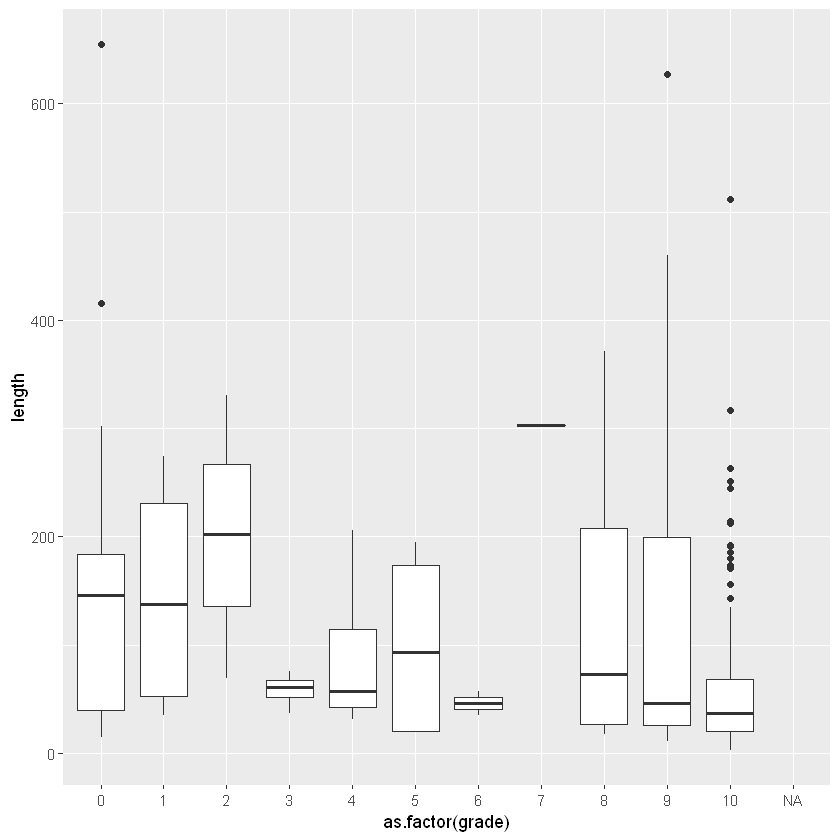

In [38]:
ggplot(counts) + geom_boxplot(aes(x=as.factor(grade), y=length))